Dataset Link :
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

Libarryies

In [717]:
#import Library
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



Read Data

In [718]:
df = pd.read_csv("D:/Abdullah_important/Heart_Diseas/archive\heart.csv")
df.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


Information


In [719]:
# INFORMATION
df.info()
print("==============================================================")
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Missing Value

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


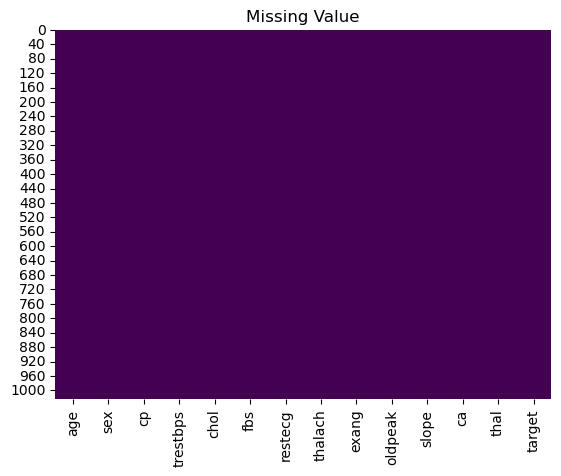

In [720]:
print(df.isna().sum())

sns.heatmap(df.isna(), cbar=False, cmap="viridis")
plt.title("Missing Value")
plt.show()


Distribution of Numerical Columns 

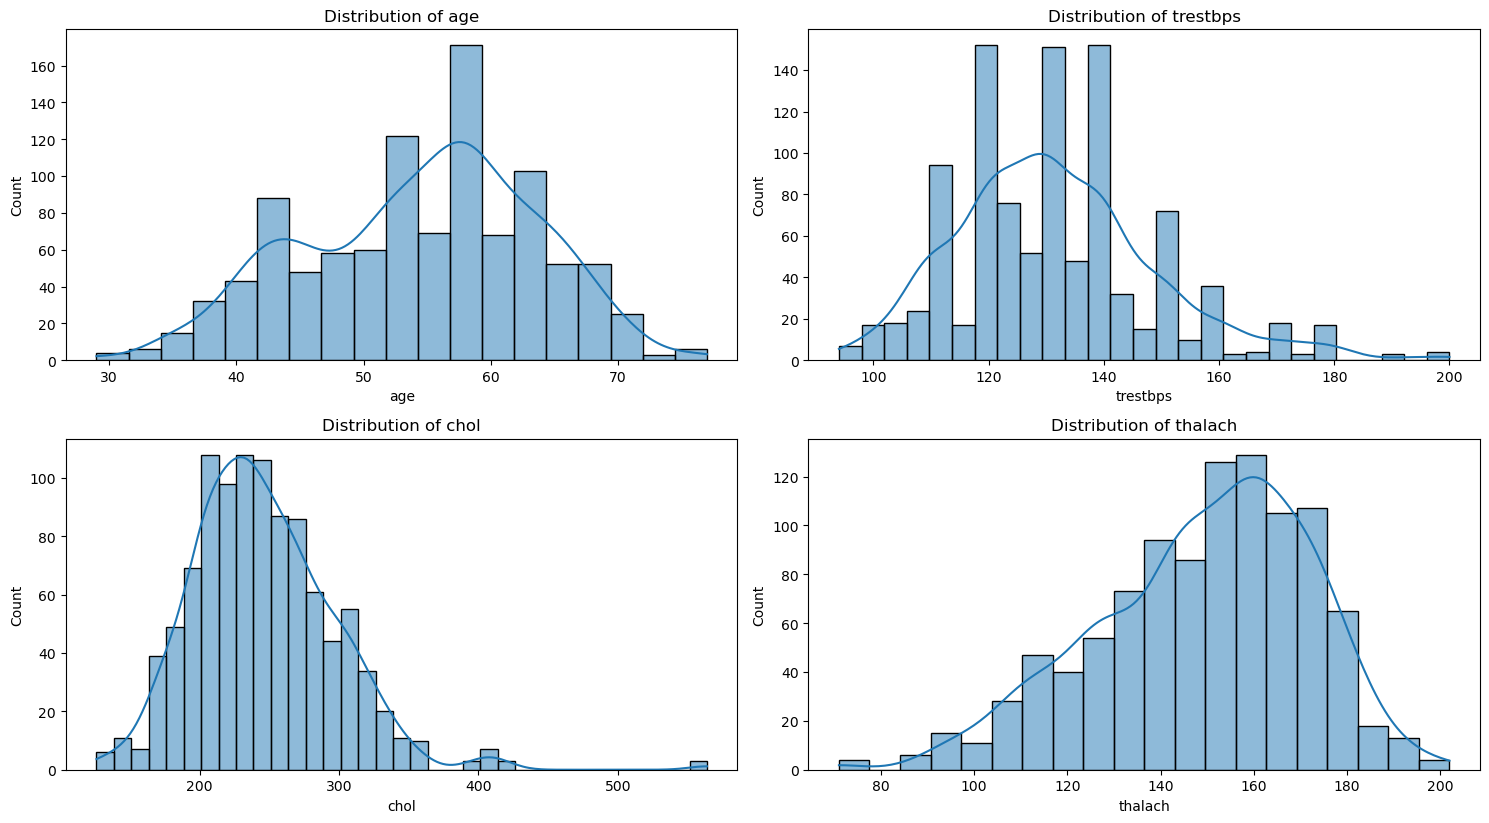

In [721]:
Numerical_columns = ["age","trestbps","chol","thalach"]
plt.figure(figsize=(15,12))
for i, col in enumerate(Numerical_columns, 1):
    plt.subplot(3,2,i) 
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()



Check Outliers

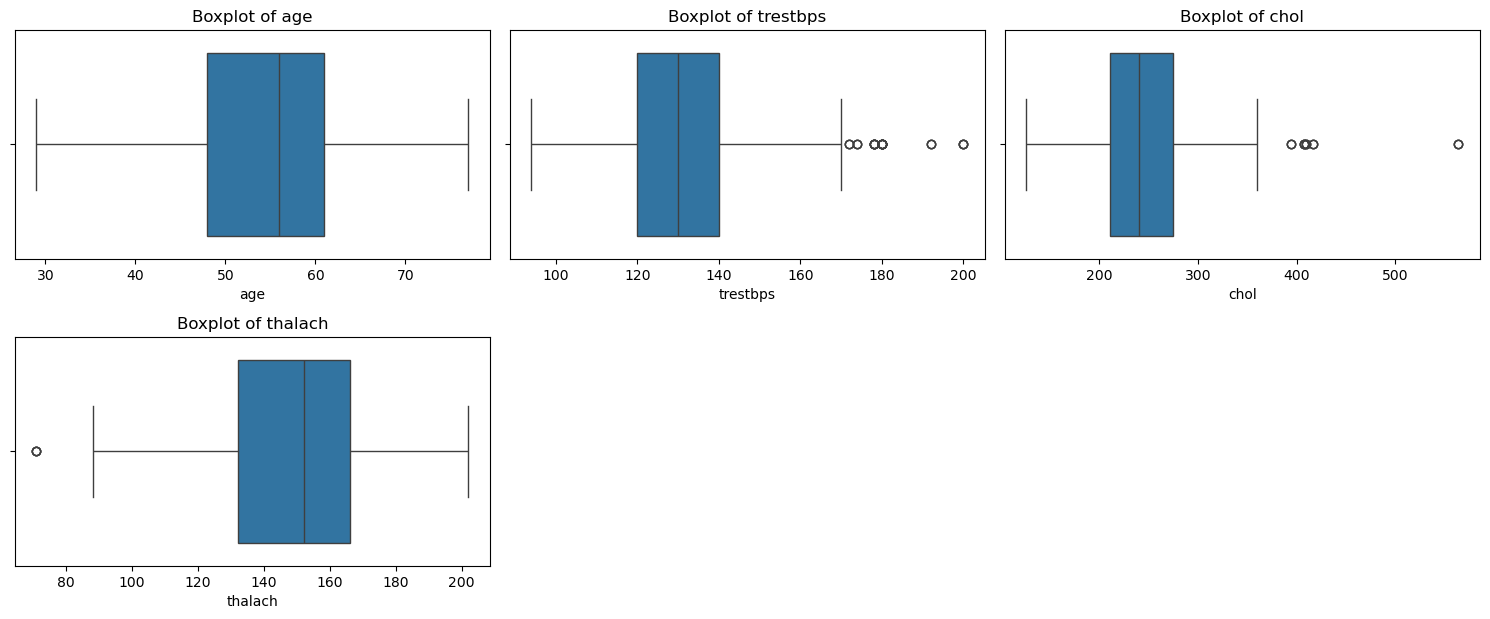

In [722]:
Numerical_columns = ["age","trestbps","chol","thalach"]
plt.figure(figsize=(15,12))
for i, col in enumerate(Numerical_columns, 1):
    plt.subplot(4,3,i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


Handling outliers

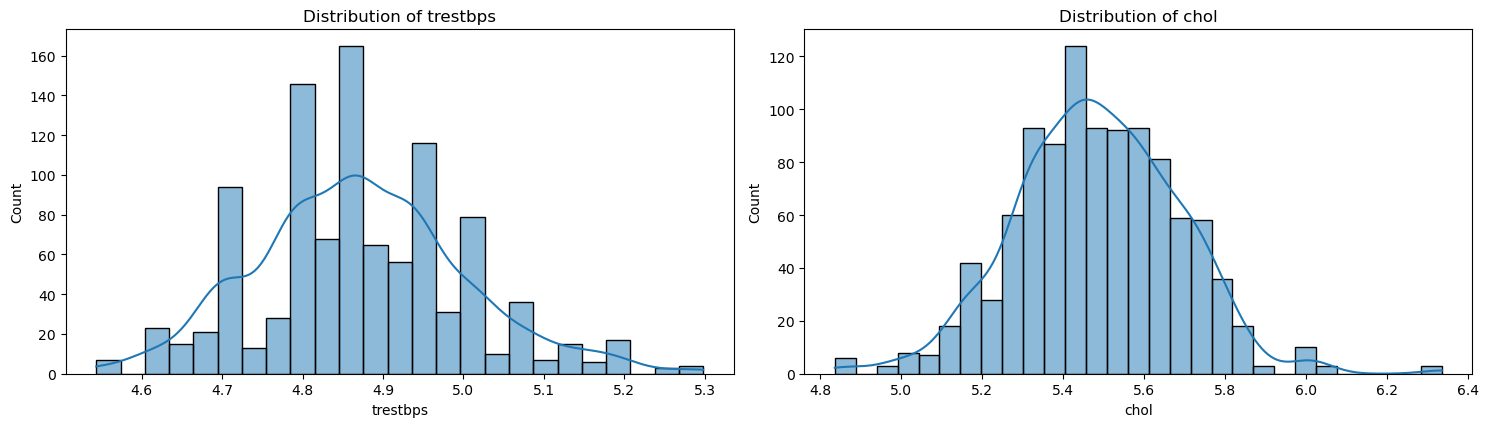

In [723]:
Numerical_columns_Outliers = ["trestbps","chol"]

for col in Numerical_columns_Outliers:
    df[col] = np.log(df[col])


#HistoGram 
plt.figure(figsize=(15,12))
for i, col in enumerate(Numerical_columns_Outliers, 1):
    plt.subplot(3,2,i) 
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


Show the Categorical Data

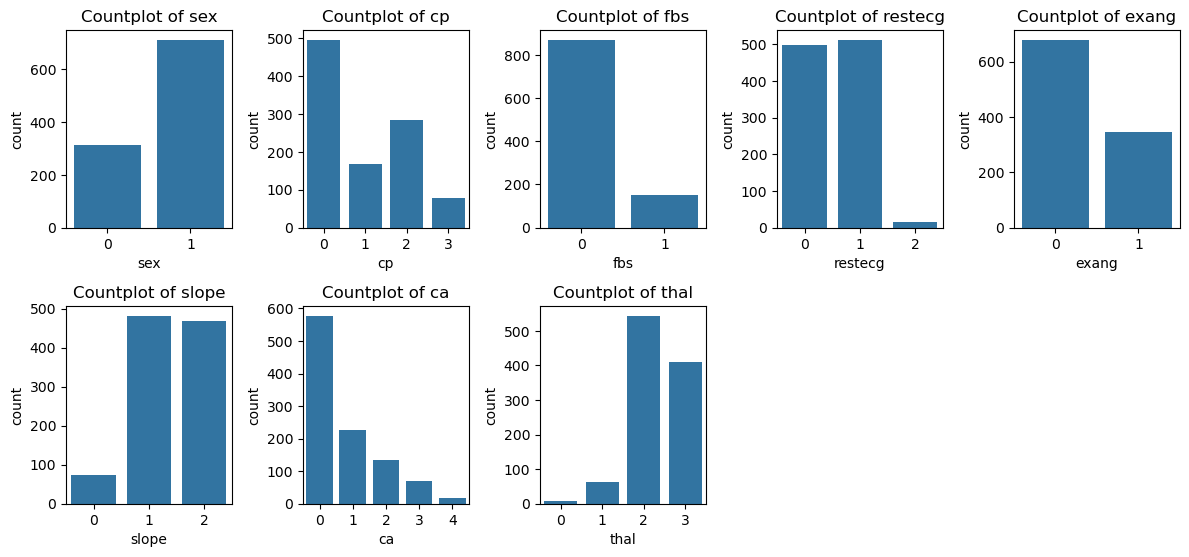

In [724]:
Categorical_columns = ["sex","cp","fbs","restecg","exang","slope","ca","thal"]

plt.figure(figsize=(12,8))
for i, col in enumerate(Categorical_columns, 1):
    plt.subplot(3,5,i)
    sns.countplot(x=df[col])
    plt.title(f'Countplot of {col}')
plt.tight_layout()
plt.show()


The Relation Between Target & Feature

In [725]:
corr = df.corr()
print(corr['target'].sort_values(ascending=False))



target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.107397
trestbps   -0.136737
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64


In [726]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,4.828314,5.356586,0,1,168,0,1.0,2,2,3,0
1,53,1,0,4.941642,5.313206,1,0,155,1,3.1,0,0,3,0
2,70,1,0,4.976734,5.159055,0,1,125,1,2.6,0,0,3,0
3,61,1,0,4.997212,5.313206,0,1,161,0,0.0,2,1,3,0
4,62,0,0,4.927254,5.683580,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,4.941642,5.398163,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,4.828314,5.552960,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,4.700480,5.616771,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,4.700480,5.537334,0,0,159,0,0.0,2,0,2,1


Scaling the Features

In [727]:
num_cols = ['age','trestbps','chol','thalach','oldpeak','ca']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,0,-0.331385,-0.628178,0,1,0.821321,0,-0.060888,2,1.209221,3,0
1,-0.158157,1,0,0.541838,-0.841304,1,0,0.255968,1,1.727137,0,-0.731971,3,0
2,1.716595,1,0,0.812225,-1.598639,0,1,-1.048692,1,1.301417,0,-0.731971,3,0
3,0.724079,1,0,0.970017,-0.841304,0,1,0.516900,0,-0.912329,2,0.238625,3,0
4,0.834359,0,0,0.430970,0.978327,1,1,-1.874977,0,0.705408,1,2.179817,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,1,1,0.541838,-0.423915,0,1,0.647366,1,-0.912329,2,-0.731971,2,1
1021,0.613800,1,0,-0.331385,0.336596,0,0,-0.352873,1,1.471705,1,0.238625,3,0
1022,-0.819834,1,0,-1.316371,0.650099,0,0,-1.353113,1,-0.060888,1,0.238625,2,0
1023,-0.488996,0,0,-1.316371,0.259829,0,0,0.429923,0,-0.912329,2,-0.731971,2,1


Split The Data

In [728]:
X = df.drop('target', axis = 1)
Y = df['target']

#Split
x_train , x_test , y_train , y_test = train_test_split (
    X , Y , test_size = 0.3 , random_state = 42
)



print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)
print("===================================================================")
print("Train shape:", y_train.shape)
print("Test shape:", y_test.shape)

Train shape: (717, 13)
Test shape: (308, 13)
Train shape: (717,)
Test shape: (308,)


Model 1 (Logistic Regression)

In [729]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(x_train, y_train)

log_pred = log_model.predict(x_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))


# when edit the test_size = 0.2 the acc = 80 %




Logistic Regression Accuracy: 0.8116883116883117


Confusion Matrix for Model 1

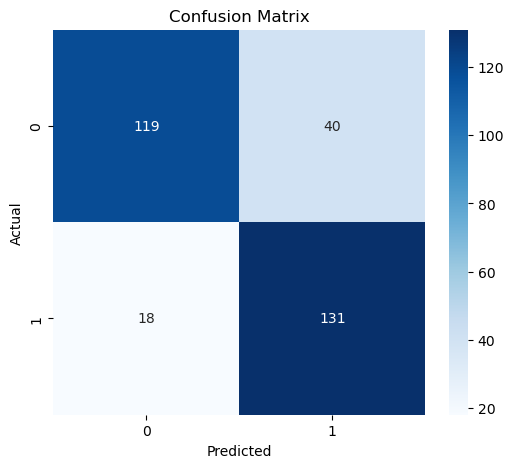

              precision    recall  f1-score   support

           0       0.87      0.75      0.80       159
           1       0.77      0.88      0.82       149

    accuracy                           0.81       308
   macro avg       0.82      0.81      0.81       308
weighted avg       0.82      0.81      0.81       308



In [730]:
cm = confusion_matrix(y_test, log_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, log_pred))


Model 2 (SVM Classifier)

In [731]:

from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train, y_train)

svm_pred = svm.predict(x_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))


# when edit the test_size = 0.2 the acc = 80 %



SVM Accuracy: 0.8538961038961039


Model 3 (Random Forest Classifier)

In [732]:

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

rf_pred = rf.predict(x_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


# when edit the test_size = 0.2 the acc = 98 %


Random Forest Accuracy: 0.9902597402597403


Confusion Matrix for Model 3

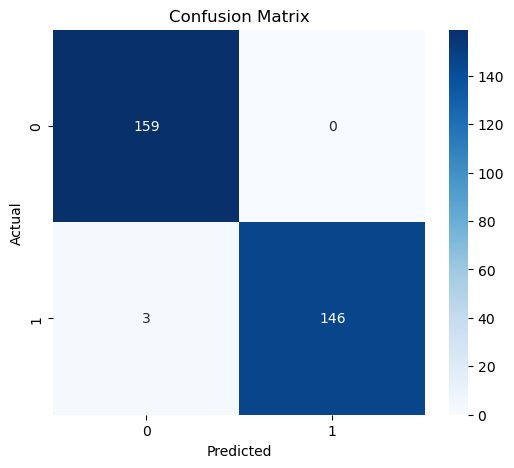

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       159
           1       1.00      0.98      0.99       149

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



In [733]:
cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, rf_pred))
